<a href="https://colab.research.google.com/github/sachsac/teaching_data/blob/main/TA_Hours_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install openpyxl==3.0.0 #excel pip if needed/error

In [2]:
!pip install matplotlib==3.5 #for use of bar_label

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# First Analysis 11/10/2021 - 2/28/2022

In [4]:
df = pd.read_excel('/content/drive/MyDrive/Work/Independent Projects/TA work/TA helping.xlsx', sheet_name='BAS', usecols=['Cohort', 'Stack', 'Day of week','Time (Pacific)', 'Pacific Time (Military)', 'Off Hours Request? Y/N'])
df.head()

,Cohort,Stack,Day of week,Time (Pacific),Pacific Time (Military),Off Hours Request? Y/N
0,8/30,Advanced Machine Learning,Wed,15:00:00,1500,No
1,10/11,Machine Learning,Wed,16:36:00,1636,No
2,8/30,Advanced Machine Learning,Thu,11:05:00,1105,Yes
3,8/30,Advanced Machine Learning,Sun,19:40:00,1940,Yes
4,8/30,Advanced Machine Learning,Sun,17:11:00,1711,Yes


In [5]:
#how much of a sample size do we have?
df.info() # number of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cohort                   83 non-null     object
 1   Stack                    83 non-null     object
 2   Day of week              83 non-null     object
 3   Time (Pacific)           83 non-null     object
 4   Pacific Time (Military)  83 non-null     int64 
 5   Off Hours Request? Y/N   83 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.0+ KB


## Day analysis

In [6]:
#my preferred style
plt.style.use('seaborn')

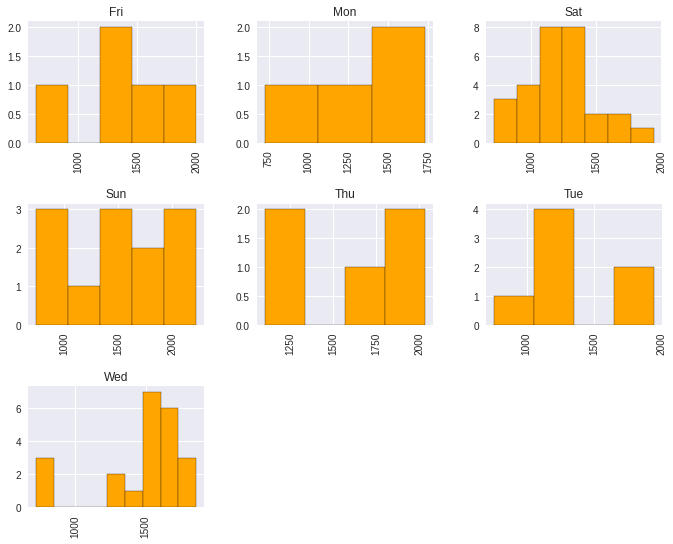

In [7]:
#fig, ax = plt.subplots(3,3)
plt.rcParams["figure.figsize"] = (11, 9)
df['Pacific Time (Military)'].hist(by = df['Day of week'], bins = 'auto', color = 'orange', edgecolor = 'black');

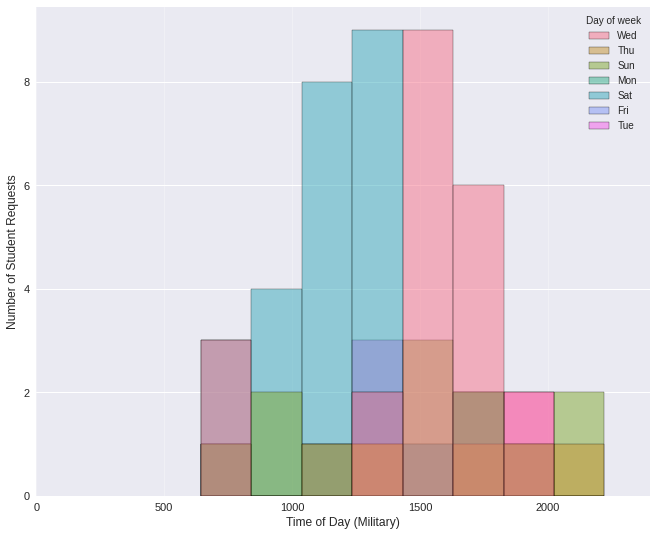

In [8]:
sns.histplot(data = df, x='Pacific Time (Military)', hue = "Day of week", bins = 'auto')
plt.grid(axis = 'x', alpha = 0.3)
plt.xlim(0,2400)
plt.xticks(rotation = 0, fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Time of Day (Military)', fontsize = 12)
plt.ylabel('Number of Student Requests', fontsize = 12);

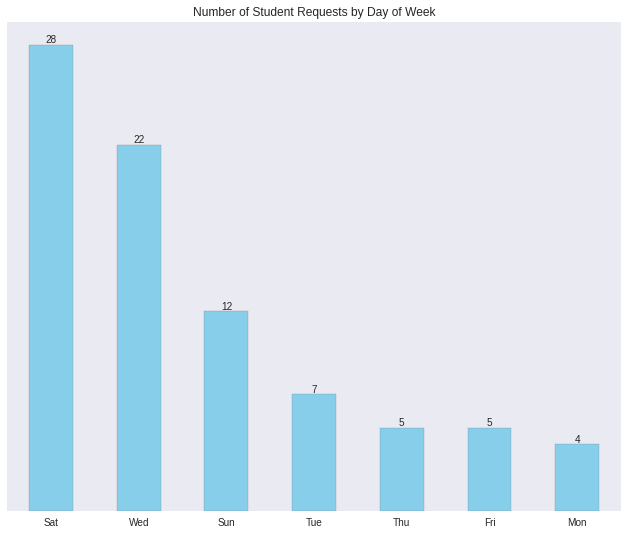

In [9]:
ax = df['Day of week'].value_counts().plot(kind= 'bar', color= 'skyblue', edgecolor = 'gray')
plt.title('Number of Student Requests by Day of Week')
plt.grid(visible = None)
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], fmt = '%d')
ax.get_yaxis().set_visible(False);
#hide y-axis

## By Cohort

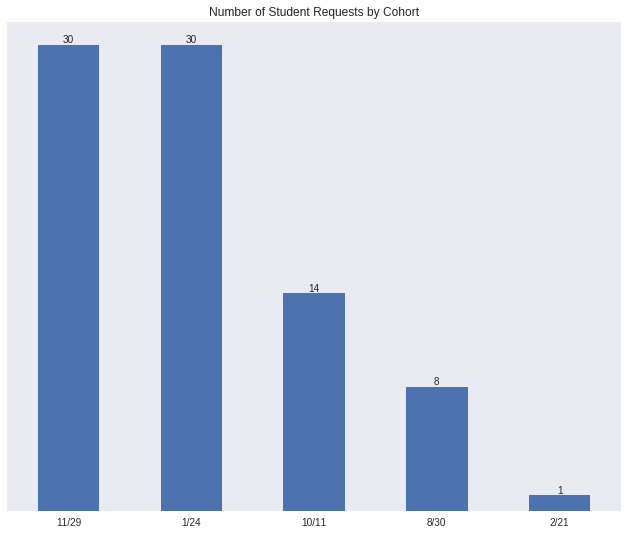

In [16]:
#remove the unknowns
df1 = df[df['Cohort']!= 'Unknown']
ax = df1['Cohort'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0])
plt.grid(visible = None)
ax.get_yaxis().set_visible(False);#hide y-axis 
plt.title('Number of Student Requests by Cohort');

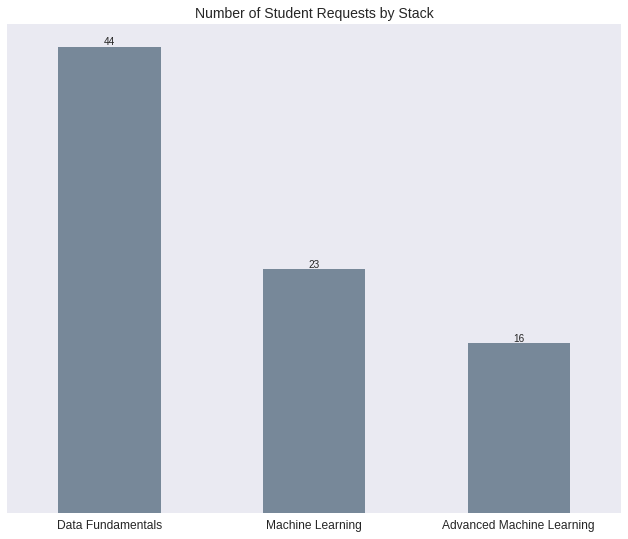

In [17]:
ax = df['Stack'].value_counts().plot(kind='bar', color = 'lightslategray')
plt.title('Number of Student Requests by Stack', fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.grid(visible = None)
ax.bar_label(ax.containers[0])
ax.get_yaxis().set_visible(False);#hide y-axis ;

## Off hours contact

In [18]:
offhours = df['Off Hours Request? Y/N'].value_counts(normalize=True)
offhours = offhours.mul(100).rename('Percent').reset_index()
offhours
#https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

,index,Percent
0,Yes,50.60241
1,No,49.39759


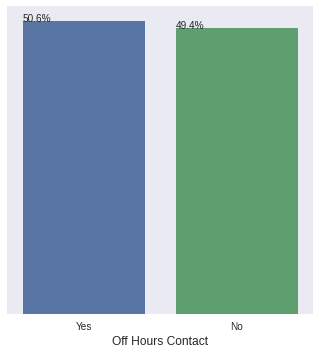

In [19]:
g = sns.catplot(x='index', y='Percent', kind='bar', data=offhours)
#plt.title('Off Hours Contact')
plt.xlabel('Off Hours Contact', fontsize = 12)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt) 
g.ax.get_yaxis().set_visible(False)
plt.rcParams.update({'font.size': 12})
plt.grid(alpha = 0);
#https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

Shockingly, contact is close to 50/50 regarding if a student asks a TA for help during their hours. A small majority of contact is during off hours.

# Second Analysis 3/1/2022 - Present

After noticing one problem may be because of the use of a personal account, which sometimes shows me "Online" outside of hours due to personal Discord use: received separate account dedicated to TA position, reducing accidental contacts during non-hours.

In [20]:
df2 = pd.read_excel('/content/drive/MyDrive/Work/Independent Projects/TA work/TA helping.xlsx', sheet_name='AAS', usecols=['Cohort', 'Stack', 'Day of week','Time (Pacific)','Pacific Time (Military)', 'Off Hours Request? Y/N'])
df2.head()

,Cohort,Stack,Day of week,Time (Pacific),Pacific Time (Military),Off Hours Request? Y/N
0,2/21,Data Fundamentals,Tue,11:08:00,1108,Yes
1,11/29,Advanced Machine Learning,Tue,17:50:00,1750,No
2,1/24,Machine Learning,Tue,18:04:00,1804,No
3,11/29,Advanced Machine Learning,Tue,18:47:00,1847,No
4,11/29,Advanced Machine Learning,Wed,14:06:00,1406,Yes


In [21]:
#how much of a sample size do we have?
df2.info() # number of entries = sample size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cohort                   58 non-null     object
 1   Stack                    58 non-null     object
 2   Day of week              58 non-null     object
 3   Time (Pacific)           58 non-null     object
 4   Pacific Time (Military)  58 non-null     int64 
 5   Off Hours Request? Y/N   58 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


## Day analysis

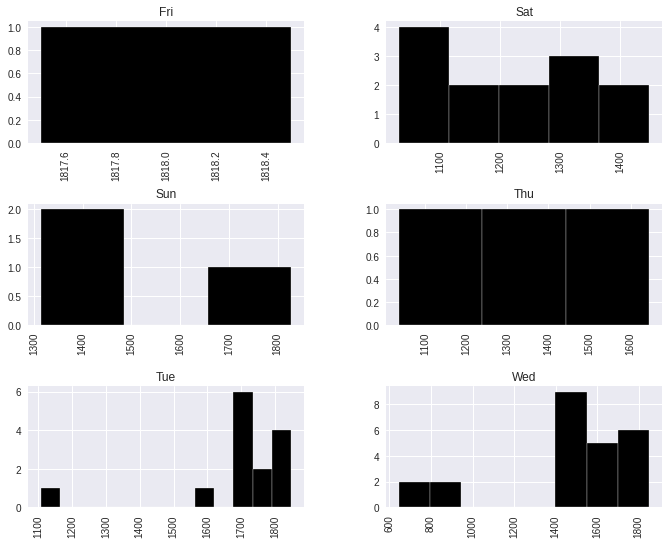

In [22]:
df2['Pacific Time (Military)'].hist(by = df2['Day of week'], bins = 'auto', color = 'black', edgecolor = 'white');
#in this data I did not help on a monday

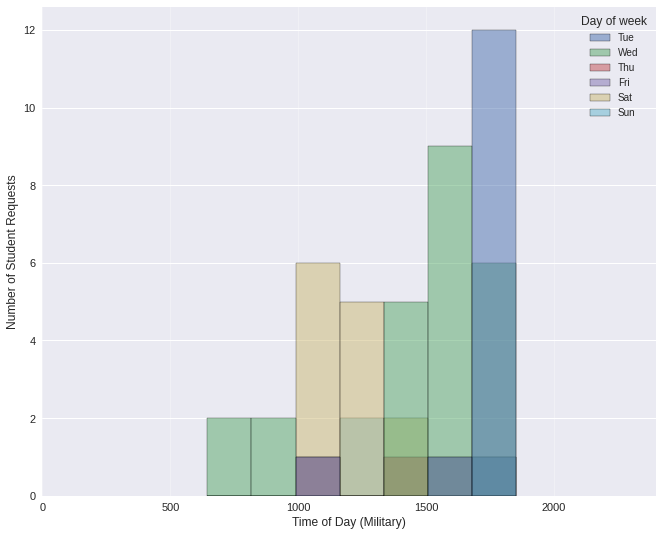

In [23]:
sns.histplot(data = df2, x='Pacific Time (Military)', hue = "Day of week", bins = 'auto')
plt.grid(alpha = 0.3, axis = 'x')
plt.xlim(0, 2400) 
plt.xticks(rotation = 0, fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Time of Day (Military)', fontsize = 12)
plt.ylabel('Number of Student Requests', fontsize = 12);

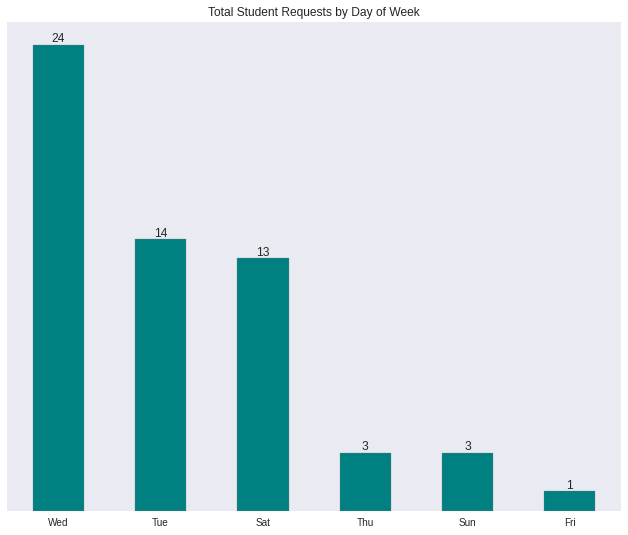

In [24]:
ax = df2['Day of week'].value_counts().plot(kind= 'bar', color= 'teal', edgecolor = 'gray')
plt.title('Total Student Requests by Day of Week')
plt.ylabel('Number of Students')
plt.xticks(rotation = 0)
plt.grid(alpha = 0)
ax.bar_label(ax.containers[0])
ax.get_yaxis().set_visible(False);#hide y-axis

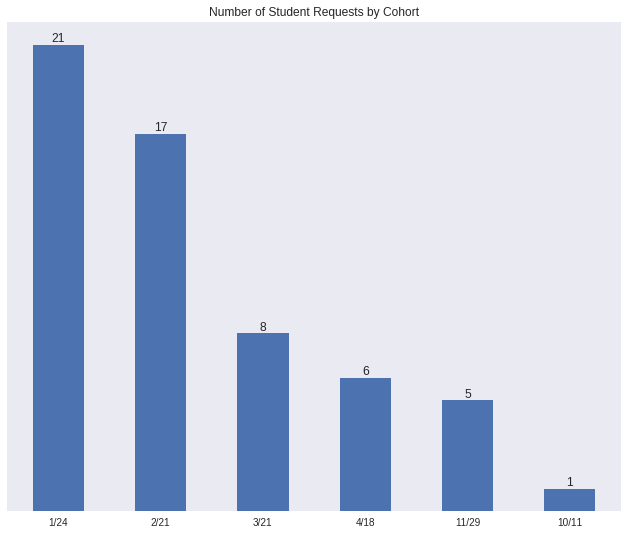

In [26]:
ax = df2['Cohort'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]) #add data values to top of bar
ax.get_yaxis().set_visible(False) #hide y-axis 
plt.xticks(rotation = 0)
plt.grid(visible = None)
plt.title('Number of Student Requests by Cohort');

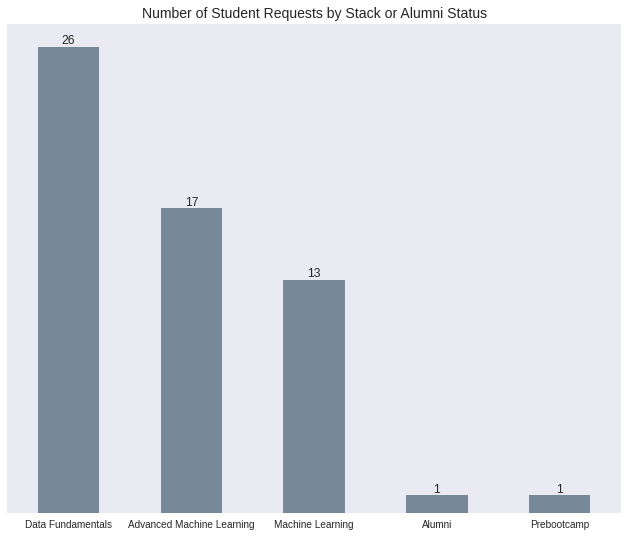

In [27]:
ax = df2['Stack'].value_counts().plot(kind='bar', color = 'lightslategray')
plt.title('Number of Student Requests by Stack or Alumni Status', fontsize = 14)
plt.xticks(rotation = 0, fontsize = 10)
plt.grid(alpha = 0) #grid by default, want to not show 
ax.bar_label(ax.containers[0])
ax.get_yaxis().set_visible(False);#hide y-axis 

## Off hours contact

In [28]:
offhours2 = df2['Off Hours Request? Y/N'].value_counts(normalize=True)
offhours2 = offhours2.mul(100).rename('Percent').reset_index()
offhours2
#https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

,index,Percent
0,No,75.862069
1,Yes,24.137931


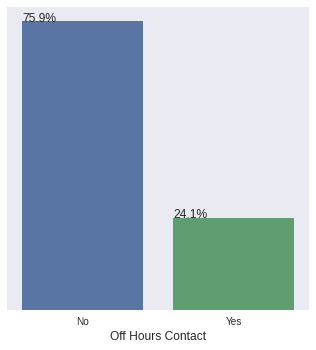

In [29]:
g = sns.catplot(x='index', y='Percent', kind='bar', data=offhours2)
plt.xlabel('Off Hours Contact', fontsize = 12)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.ax.get_yaxis().set_visible(False) 
plt.rcParams.update({'font.size': 12})
plt.grid(alpha = 0);
#https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

Drastically reduced off hour contact from students

# Time with Students Analysis

How long do interactions take with a student?

In [30]:
timedf = pd.read_excel('/content/drive/MyDrive/Work/Independent Projects/TA work/TA helping.xlsx', sheet_name='AAS')
timedf.drop(columns = 'Student', inplace= True)
timedf.head()

,Cohort,Stack,Time,Date,Day of week,Time (Pacific),Pacific Time (Military),Off Hours Request? Y/N,End Time,End Time Pacific,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,2/21,Data Fundamentals,14:08:00,2022-03-01,Tue,11:08:00,1108,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/29,Advanced Machine Learning,20:50:00,2022-03-01,Tue,17:50:00,1750,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/24,Machine Learning,21:04:00,2022-03-01,Tue,18:04:00,1804,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/29,Advanced Machine Learning,21:47:00,2022-03-01,Tue,18:47:00,1847,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/29,Advanced Machine Learning,17:06:00,2022-03-02,Wed,14:06:00,1406,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#not everyone in this has the begin and end times 
time_nulls = timedf['Total Time helping (mins)'].isna()
timedf[~time_nulls]

,Cohort,Stack,Time,Date,Day of week,Time (Pacific),Pacific Time (Military),Off Hours Request? Y/N,End Time,End Time Pacific,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
8,2/21,Data Fundamentals,21:38:00,2022-03-02,Wed,18:38:00,1838,No,22:45:00,19:45:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2/21,Data Fundamentals,20:26:00,2022-03-08,Tue,17:26:00,1726,No,21:52:00,18:52:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1/24,Machine Learning,09:45:00,2022-03-09,Wed,06:45:00,645,Yes,10:08:00,07:08:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2/21,Data Fundamentals,11:39:00,2022-03-09,Wed,08:39:00,839,No,11:45:00,08:45:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2/21,Data Fundamentals,17:28:00,2022-03-09,Wed,14:28:00,1428,Yes,17:52:00,14:52:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1/24,Machine Learning,15:20:00,2022-03-12,Sat,12:20:00,1220,No,15:40:00,12:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1/24,Machine Learning,17:28:00,2022-03-12,Sat,14:28:00,1428,Yes,18:12:00,15:12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1/24,Machine Learning,17:48:00,2022-03-12,Sat,14:48:00,1448,Yes,17:50:00,14:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2/21,Data Fundamentals,21:28:00,2022-03-13,Sun,18:28:00,1828,Yes,21:29:00,18:29:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1/24,Machine Learning,21:35:00,2022-03-15,Tue,18:35:00,1835,No,21:44:00,18:44:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
time_df = timedf[~time_nulls]
#also need to exclude time that is 0
time_df = time_df[time_df['Total Time helping (mins)'] >0]
time_df['Total Time helping (mins)'].describe()

count     39.000000
mean      35.358974
std       45.600373
min        1.000000
25%        6.000000
50%       23.000000
75%       44.500000
max      229.000000
Name: Total Time helping (mins), dtype: float64

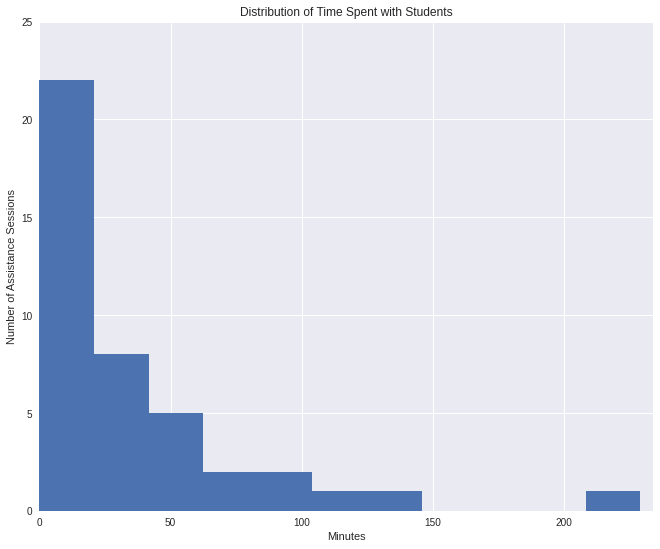

In [33]:
ax = timedf[~time_nulls]['Total Time helping (mins)'].hist(bins = 'auto')
plt.title('Distribution of Time Spent with Students')
max_time = time_df['Total Time helping (mins)'].max()
plt.ylim(0, 25) #add cushion above our max
plt.xlim(0, max_time +5) #start at, end past max time
plt.ylabel('Number of Assistance Sessions')
plt.xlabel ('Minutes');

count     39.000000
mean      35.358974
std       45.600373
min        1.000000
25%        6.000000
50%       23.000000
75%       44.500000
max      229.000000
Name: Total Time helping (mins), dtype: float64


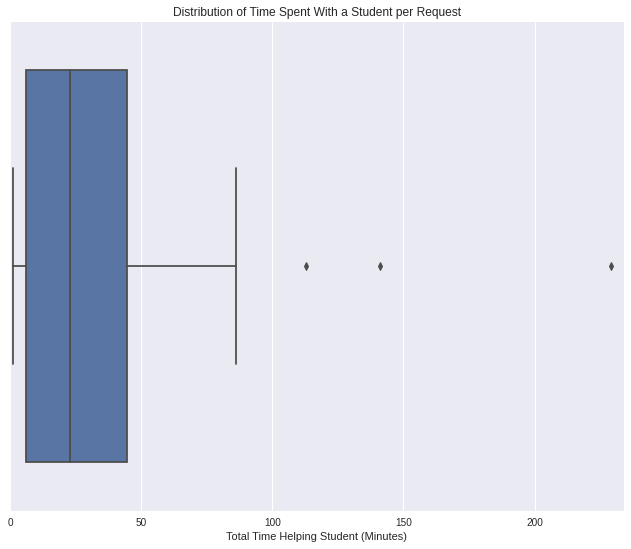

In [34]:
ax = sns.boxplot(data= time_df, x='Total Time helping (mins)')
max_time = time_df['Total Time helping (mins)'].max()
plt.title('Distribution of Time Spent With a Student per Request')
plt.xlabel('Total Time Helping Student (Minutes)')
plt.xlim(0, (max_time+5));
print(time_df['Total Time helping (mins)'].describe())

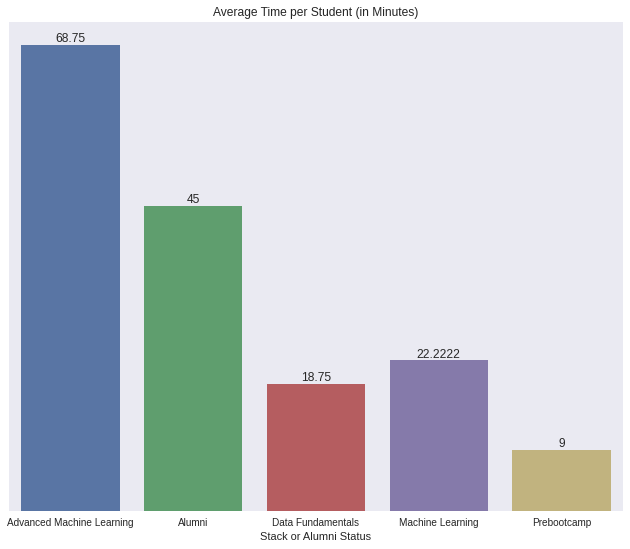

In [35]:
stack_time = time_df.groupby('Stack')['Total Time helping (mins)'].mean()
ax = sns.barplot(x = stack_time.index,
                 y = stack_time.values,
                 ci = None) #
ax.bar_label(ax.containers[0])
ax.get_yaxis().set_visible(False) #hide y-axis 
plt.xlabel('Stack or Alumni Status')
plt.title('Average Time per Student (in Minutes)');

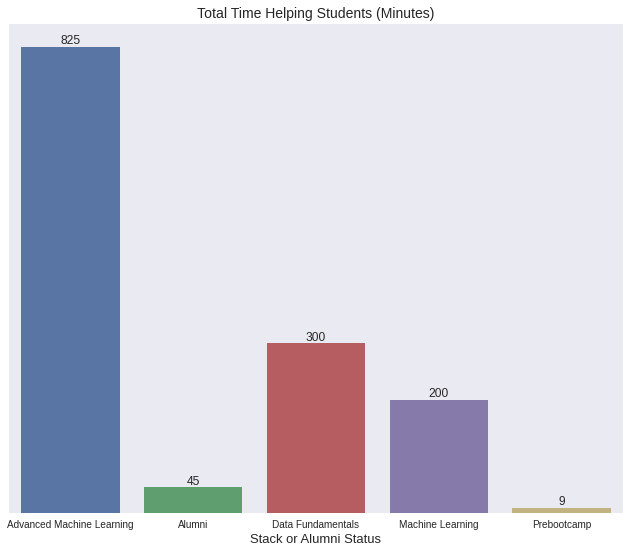

In [36]:
stack_time = time_df.groupby('Stack')['Total Time helping (mins)'].sum()
ax = sns.barplot(x = stack_time.index,
                 y = stack_time.values,
                 ci = None)
ax.bar_label(ax.containers[0])
ax.get_yaxis().set_visible(False) #hide y-axis 
plt.xlabel('Stack or Alumni Status', fontsize = 13)
plt.title('Total Time Helping Students (Minutes)', fontsize = 14);

# Count of Student help

In [37]:
unique_student_count = pd.read_excel('/content/drive/MyDrive/Work/Independent Projects/TA work/TA helping.xlsx', sheet_name='Count per Student', usecols=['TIMES HELPED'])
unique_student_count.reset_index(inplace=True)
unique_student_count.head()

,index,TIMES HELPED
0,0,6
1,1,1
2,2,1
3,3,1
4,4,1


In [38]:
unique_student_count['TIMES HELPED'].describe()

count    60.000000
mean      2.350000
std       2.153633
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      12.000000
Name: TIMES HELPED, dtype: float64

In [39]:
unique_student_count = unique_student_count[unique_student_count['TIMES HELPED']>0]
unique_student_count['TIMES HELPED'].describe()

count    59.000000
mean      2.389831
std       2.149715
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      12.000000
Name: TIMES HELPED, dtype: float64

In [40]:
unique_student_count['TIMES HELPED'].median()

2.0

In [41]:
unique_student_count['TIMES HELPED'].value_counts()

1     25
2     18
3      7
8      3
4      3
6      1
12     1
5      1
Name: TIMES HELPED, dtype: int64

In [42]:
unique_student_count['TIMES HELPED'].value_counts().index

Int64Index([1, 2, 3, 8, 4, 6, 12, 5], dtype='int64')

In [43]:
unique_student_count['TIMES HELPED'].unique()

array([ 6,  1,  8,  2,  3, 12,  4,  5])

count    59.000000
mean      2.389831
std       2.149715
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      12.000000
Name: TIMES HELPED, dtype: float64


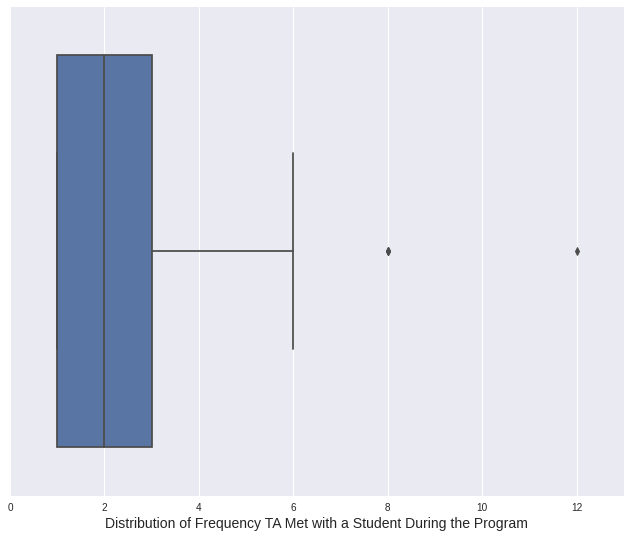

In [44]:
sns.boxplot(data= unique_student_count, x='TIMES HELPED')
max_x = unique_student_count['TIMES HELPED'].max()
plt.xlim(0, (max_x + 1))
plt.xlabel('Distribution of Frequency TA Met with a Student During the Program', fontsize = 14);
print(unique_student_count['TIMES HELPED'].describe())

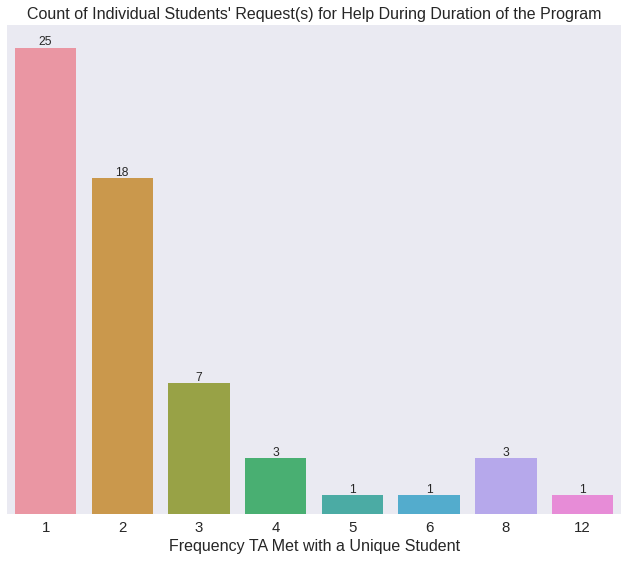

In [45]:
counts = unique_student_count['TIMES HELPED'].value_counts()

ax  = sns.barplot(x = counts.index, 
            y = counts.values,
            order= counts.index.sort_values())

ax.bar_label(ax.containers[0])

ax.get_yaxis().set_visible(False)#hide y-axis 
plt.xticks(fontsize = 15, rotation = 0)
plt.title("Count of Individual Students' Request(s) for Help During Duration of the Program", fontsize =16)
plt.xlabel('Frequency TA Met with a Unique Student', fontsize = 16);

# [Model in a separate Colab](https://colab.research.google.com/drive/1yS7gVKGAI_-aj19BhInKspsJRKMtvmMt?usp=sharing)